## Importing Libraries and Reading DataSet

In [67]:
# Importing the basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import os
#display all columns 
from IPython.display import display
pd.set_option('display.max_columns', None)
# ignore some plotnine junk warnings. TODO: check what is generating the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
#from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [68]:
# Reading the data
bank_transactions_data = pd.read_csv(r"bank_transactions.csv", delimiter=',')
df_original_len = len(bank_transactions_data)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(bank_transactions_data.shape[0], bank_transactions_data.shape[1]))

Original length of dataframe: 1048567
There are 1048567 rows and 9 columns in the dataset


In [69]:
bank_transactions_data.head()
bank_transactions_data.tail()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [70]:
bank_transactions_data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [71]:
# To find out the time span of the data set
# Convert the 'TransactionDate' column to datetime if it's not already
bank_transactions_data['TransactionDate'] = pd.to_datetime(bank_transactions_data['TransactionDate'])

# Find the earliest and latest dates
earliest_date = bank_transactions_data['TransactionDate'].min()
latest_date = bank_transactions_data['TransactionDate'].max()

# Calculate the time span
time_span = latest_date - earliest_date

print(f"Earliest transaction date: {earliest_date}")
print(f"Latest transaction date: {latest_date}")
print(f"Time span of the data: {time_span}")

Earliest transaction date: 2016-01-08 00:00:00
Latest transaction date: 2016-12-09 00:00:00
Time span of the data: 336 days 00:00:00


## Cleaning Data

In [5]:
bank_transactions_data.info()
# Calculate the percentage of missing values for each column
missing_percentage = bank_transactions_data.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.

<font color='gold'>**TransactionID**</font>:

In [72]:
# Checking if the TransactionID's are unique
if (len(bank_transactions_data['TransactionID'].unique()) == len(bank_transactions_data)):
    print("TransactionID's are unique, no need to aggregate")
else:
    print("TransactionID's are not unique, need to aggregate")

TransactionID's are unique, no need to aggregate


In [73]:
# Dropping the TransactionID column since it is not going to be used in modeling and they are unique
bank_transactions_data = bank_transactions_data.drop('TransactionID', axis=1)


<font color='gold'>**Missing Values**</font>:

We addressed missing values in the dataset with strategies tailored to each column's characteristics:

1. **CustomerDOB**: Dropped rows with missing values, as age is vital for our analysis and the missing percentage was low (0.32%).

2. **CustGender**: Filled missing values with the mode, given the minimal missing data (0.10%), ensuring gender distribution remains unaffected.

3. **CustLocation**: Also filled with the mode due to an insignificant percentage of missing values (0.01%), maintaining geographical consistency.

4. **CustAccountBalance**: Missing values were filled with the median to avoid skewing by outliers, suitable for a numerical variable with potential for skewed distribution.

These methods ensure data integrity, especially for crucial variables like age, and maintain the overall data distribution for reliable analysis.


In [6]:
# Filling missing values
# Drop rows where CustomerDOB is NaN
bank_transactions_data.dropna(subset=['CustomerDOB'], inplace=True)
# Impute missing data for gender with mode
bank_transactions_data['CustGender'].fillna(bank_transactions_data['CustGender'].mode()[0], inplace=True)
# Impute missing data for customer location with mode
bank_transactions_data['CustLocation'].fillna(bank_transactions_data['CustLocation'].mode()[0], inplace=True)
# Impute missing data for account balance with median
bank_transactions_data['CustAccountBalance'].fillna(bank_transactions_data['CustAccountBalance'].median(), inplace=True)

# Print the count of missing values for each column after cleaning
print(bank_transactions_data.isnull().sum())


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [74]:
# Check for duplicate rows
duplicate_rows = bank_transactions_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [75]:
## Show detailes data set
def check(bank_transactions_data):
    l=[]
    columns=bank_transactions_data.columns
    for col in columns:
        dtypes=bank_transactions_data[col].dtypes
        nunique=bank_transactions_data[col].nunique()
        sum_null=bank_transactions_data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(bank_transactions_data)

,column,dtypes,nunique,sum_null
0,CustomerID,object,884265,0
1,CustomerDOB,object,17254,3397
2,CustGender,object,3,1100
3,CustLocation,object,9355,151
4,CustAccountBalance,float64,161328,2369
5,TransactionDate,datetime64[ns],55,0
6,TransactionTime,int64,81918,0
7,TransactionAmount (INR),float64,93024,0


<font color='gold'>**TransactionDate**</font>:

We extract day and month from Transaction date to check for any difference in transacation paterns over time and also create a new feature "DaysSinceLastTransaction" 

In [80]:
from datetime import datetime

# Extracting day, month, and year from TransactionDate
bank_transactions_data['TransactionDate'] = pd.to_datetime(bank_transactions_data['TransactionDate'], errors='coerce')
bank_transactions_data['TransactionDay'] = bank_transactions_data['TransactionDate'].dt.day
bank_transactions_data['TransactionMonth'] = bank_transactions_data['TransactionDate'].dt.month

In [81]:
# Days since last transaction based on TransactionDate 
last_transaction = bank_transactions_data.groupby('CustomerID')['TransactionDate'].max().rename('LastTransactionDate')
bank_transactions_data = bank_transactions_data.merge(last_transaction, on='CustomerID')
bank_transactions_data['DaysSinceLastTransaction'] = (bank_transactions_data['TransactionDate'] - bank_transactions_data['LastTransactionDate']).dt.days

1. Plot for Number of Transactions Based on Month

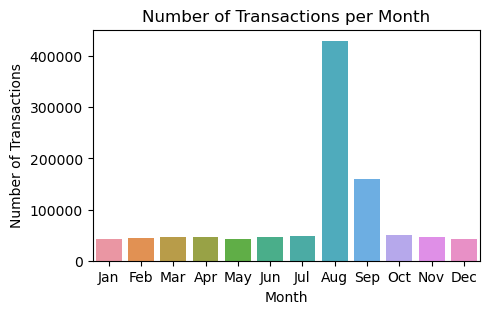

In [90]:
# Counting transactions per month
transactions_per_month = bank_transactions_data.groupby('TransactionMonth').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

2. Plot for Number of Transactions Based on Day of the Month

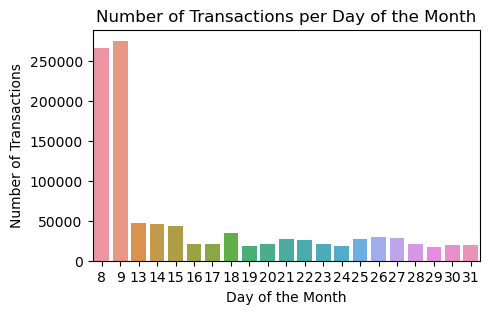

In [91]:
# Counting transactions per day of the month
transactions_per_day = bank_transactions_data.groupby('TransactionDay').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day of the Month')
plt.show()


3. General Plot Based on Date

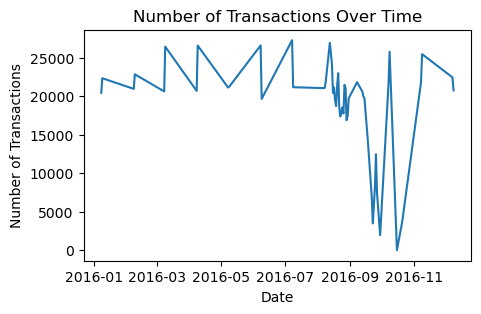

In [92]:
# Counting transactions per date
transactions_per_date = bank_transactions_data.groupby(bank_transactions_data['TransactionDate'].dt.date).size()

# Plotting
plt.figure(figsize=(5, 3))
transactions_per_date.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.show()


<font color='gold'>**TransactionTime**</font>:

Extracting hour from transaction time to check for any paterns over a day

In [78]:
# Function to extract hour from HHMMSS format
def extract_hour(time_int):
    time_str = str(time_int).zfill(6)  # Ensure the string has 6 digits
    hour = int(time_str[:2])  # Extract the first two characters and convert to int
    return hour

# Apply the function to extract the hour 
bank_transactions_data['TransactionHour'] = bank_transactions_data['TransactionTime'].apply(extract_hour)
# Drop Transaction time 
bank_transactions_data = bank_transactions_data.drop('TransactionTime', axis=1)


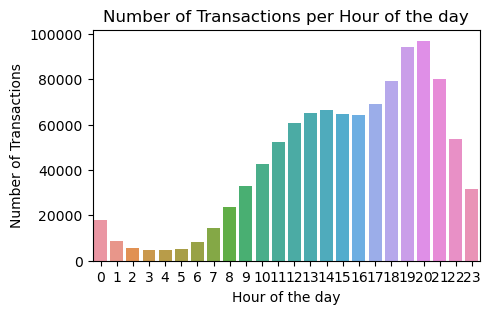

In [94]:
# Counting transactions per hour of the day
transactions_per_hour = bank_transactions_data.groupby('TransactionHour').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_hour.index, y=transactions_per_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour of the day')
plt.show()

<font color='gold'>**CustomerDOB**</font>:

Calculating Age of customers 

In [84]:
# Convert CustomerDOB to datetime and calculate age
current_year = datetime.now().year
bank_transactions_data['CustomerDOB'] = pd.to_datetime(bank_transactions_data['CustomerDOB'], errors='coerce')
bank_transactions_data['Age'] = current_year - bank_transactions_data['CustomerDOB'].dt.year


In [85]:
bank_transactions_data = bank_transactions_data.drop('CustomerDOB', axis=1)

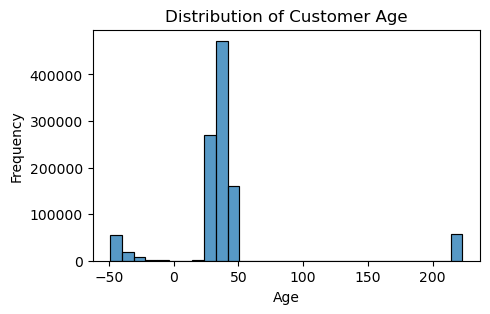

In [95]:
plt.figure(figsize=(5, 3))
sns.histplot(bank_transactions_data['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

The age is negative because anyone can open a savings account on behalf of a child or grandchild

<font color='gold'>**Gender**</font>:

In [62]:
# Checking Gender column
bank_transactions_data.CustGender.value_counts()

M    763839
F    281330
T         1
Name: CustGender, dtype: int64

In [64]:
# Since there is just one T we will drop it
bank_transactions_data.drop(bank_transactions_data[bank_transactions_data['CustGender']=='T'].index,inplace=True)

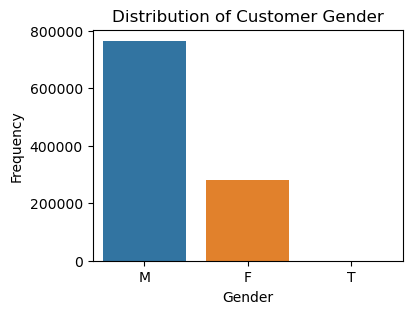

In [97]:
# Counting the frequency of each gender
gender_count = bank_transactions_data['CustGender'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Gender')
plt.show()

<font color='gold'>**CustLocation**</font>:

In [115]:
# Counting transactions per city
transactions_per_city = bank_transactions_data['CustLocation'].value_counts()

# Identifying cities with fewer than 500 transactions
cities_with_less_than_500 = transactions_per_city[transactions_per_city < 500]

# Counting the number of such cities
number_of_cities_less_than_500 = len(cities_with_less_than_500)

# Total number of unique cities
total_unique_cities = bank_transactions_data['CustLocation'].nunique()

# Calculating the percentage
percentage_of_cities_with_less_than_500 = (number_of_cities_less_than_500 / total_unique_cities) * 100

# Counting the number of such transactions
total_transactions_in_cities_less_than_10 = cities_with_less_than_500.shape[0]

print(total_unique_cities)
print(f"Number of cities with fewer than 500 transactions: {number_of_cities_less_than_500}")
print(f"Percentage of cities with fewer than 500 transactions: {percentage_of_cities_with_less_than_500:.2f}%")

Number of cities with fewer than 500 transactions: 9179
Percentage of cities with fewer than 500 transactions: 98.12%


In [118]:
# Replacing 'CustLocation' values for these cities with 'other'
bank_transactions_data['CustLocation'] = bank_transactions_data['CustLocation'].apply(lambda x: 'other' if x in cities_with_less_than_500 else x)
print(total_unique_cities)

177


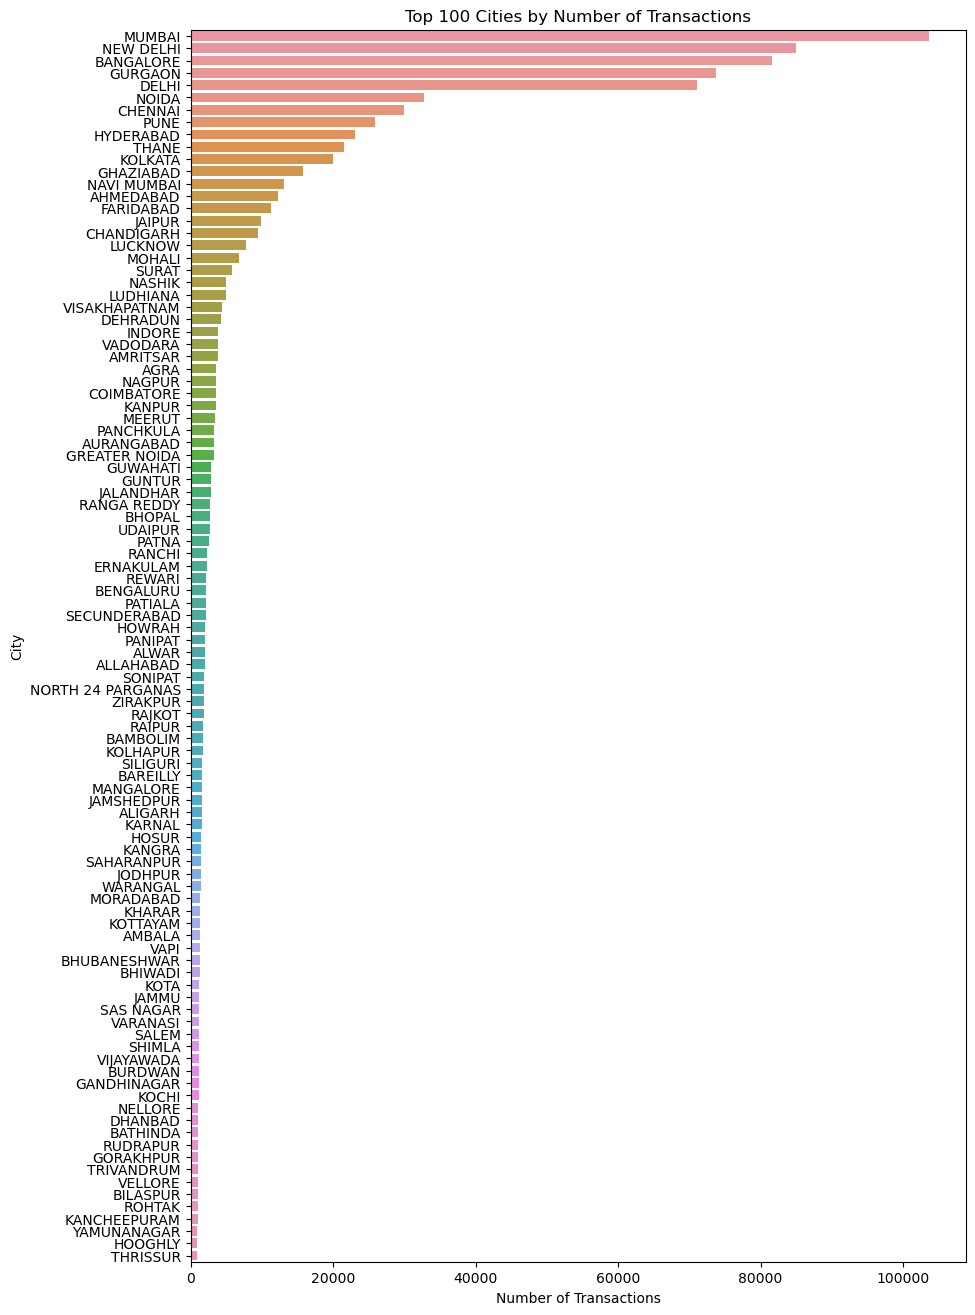

In [98]:
# Selecting the top 100 cities
top_20_cities = transactions_per_city.head(100)

# Plotting
plt.figure(figsize=(10, 16))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index)
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.title('Top 100 Cities by Number of Transactions')
plt.show()

## EDA

count    881893.000000
mean          1.185144
std           0.449771
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: CustomerID, dtype: float64


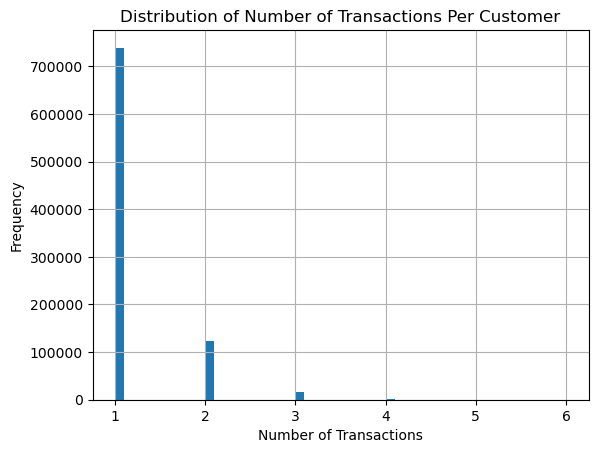

In [11]:
# Count the number of transactions for each customer
transactions_per_customer = bank_transactions_data['CustomerID'].value_counts()

# Display summary statistics of the transactions per customer
print(transactions_per_customer.describe())

# Optionally, display the distribution of transactions per customer
import matplotlib.pyplot as plt

transactions_per_customer.hist(bins=50)
plt.title('Distribution of Number of Transactions Per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


# Feature Engineering

In [14]:
# Total transaction amount per customer (Aggregated feature)
total_transaction_per_customer = bank_transactions_data.groupby('CustomerID')['TransactionAmount (INR)'].sum().rename('TotalTransactionAmount')
bank_transactions_data = bank_transactions_data.merge(total_transaction_per_customer, on='CustomerID')


In [16]:
# Log transformation of TransactionAmount
bank_transactions_data['Log_TransactionAmount'] = np.log(bank_transactions_data['TransactionAmount (INR)'] + 1)


In [17]:
# Average account balance for each customer
# Group by CustomerID and calculate mean account balance
average_balance_per_customer = bank_transactions_data.groupby('CustomerID')['CustAccountBalance'].mean().rename('AverageAccountBalance')

# Merge this average balance back into the main DataFrame
bank_transactions_data = bank_transactions_data.merge(average_balance_per_customer, on='CustomerID')


In [18]:
# Calculating the standard deviation of account balance for each customer
std_balance_per_customer = bank_transactions_data.groupby('CustomerID')['CustAccountBalance'].std().rename('StdAccountBalance')

# Merging the standard deviation back into the main DataFrame
bank_transactions_data = bank_transactions_data.merge(std_balance_per_customer, on='CustomerID')


In [19]:
# Calculating the minimum account balance for each customer
min_balance_per_customer = bank_transactions_data.groupby('CustomerID')['CustAccountBalance'].min().rename('MinAccountBalance')

# Calculating the maximum account balance for each customer
max_balance_per_customer = bank_transactions_data.groupby('CustomerID')['CustAccountBalance'].max().rename('MaxAccountBalance')

# Merging these values back into the main DataFrame
bank_transactions_data = bank_transactions_data.merge(min_balance_per_customer, on='CustomerID')
bank_transactions_data = bank_transactions_data.merge(max_balance_per_customer, on='CustomerID')


In [20]:
# Replacing zero transaction amounts with NaN to avoid division by zero
bank_transactions_data['TransactionAmount (INR)'] = bank_transactions_data['TransactionAmount (INR)'].replace(0, np.nan)

# Calculating the ratio of account balance to transaction amount
bank_transactions_data['BalanceToTransactionRatio'] = bank_transactions_data['CustAccountBalance'] / bank_transactions_data['TransactionAmount (INR)']


In [21]:
print(bank_transactions_data['CustAccountBalance'].describe())

count    1.045170e+06
mean     1.146805e+05
std      8.453402e+05
min      0.000000e+00
25%      4.732340e+03
50%      1.674491e+04
75%      5.714482e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


Based on the summary statistics for CustAccountBalance, it's clear that the data is heavily right-skewed. This is indicated by the large difference between the mean (around 114,680) and the median (around 16,745), and the very high maximum value (around 115,035,500) compared to the 75th percentile (around 57,145).

This kind of distribution often leads to histograms where most data points fall into a very narrow range, creating a single tall column. To better visualize the distribution, we tried the following approaches:

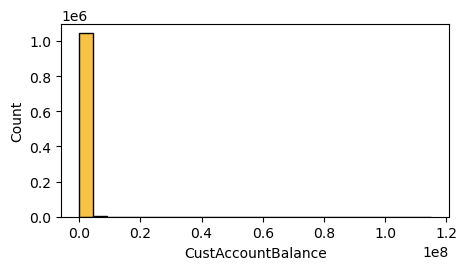

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical variable
#countplot of Age
fig = plt.figure(figsize=(5, 2.5), dpi=100)
plt.hist(bank_transactions_data['CustAccountBalance'], bins = 25, facecolor = '#f6c345', edgecolor = 'k')
plt.xlabel('CustAccountBalance')
plt.ylabel('Count')
plt.show()

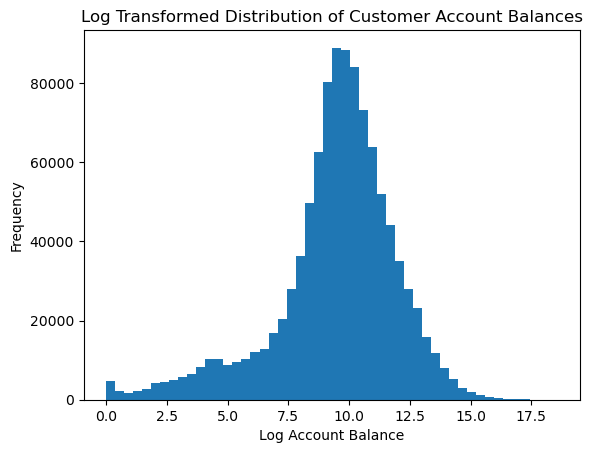

In [23]:
# Apply a log transformation
bank_transactions_data['Log_CustAccountBalance'] = np.log(bank_transactions_data['CustAccountBalance'] + 1)

plt.hist(bank_transactions_data['Log_CustAccountBalance'], bins=50)
plt.title('Log Transformed Distribution of Customer Account Balances')
plt.xlabel('Log Account Balance')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Calculate the mean and standard deviation of the log-transformed data
mean_log_balance = bank_transactions_data['Log_CustAccountBalance'].mean()
std_log_balance = bank_transactions_data['Log_CustAccountBalance'].std()

# Define thresholds for outliers (e.g., 3 standard deviations from the mean)
upper_threshold = mean_log_balance + 3 * std_log_balance
lower_threshold = mean_log_balance - 3 * std_log_balance

# Identify outliers
outliers_log = bank_transactions_data[(bank_transactions_data['Log_CustAccountBalance'] > upper_threshold) | 
                                      (bank_transactions_data['Log_CustAccountBalance'] < lower_threshold)]
print(f"Number of outliers (log-transformed): {len(outliers_log)}")


Number of outliers (log-transformed): 14701


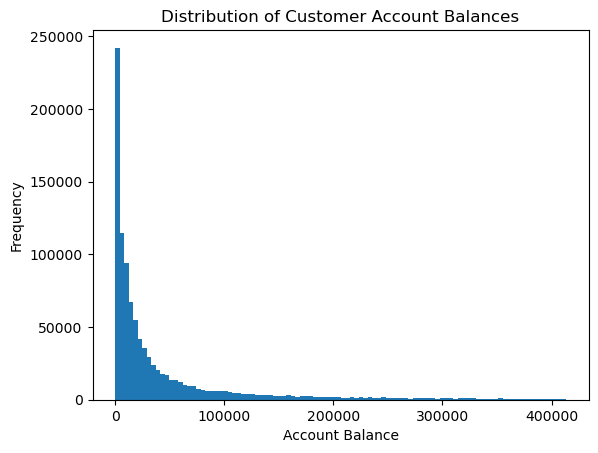

In [25]:
plt.hist(bank_transactions_data['CustAccountBalance'], bins=100, range=[0, bank_transactions_data['CustAccountBalance'].quantile(0.95)])
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Calculate the 95th percentile
percentile_95 = bank_transactions_data['CustAccountBalance'].quantile(0.95)

# Identify outliers
outliers_hist = bank_transactions_data[bank_transactions_data['CustAccountBalance'] > percentile_95]
print(f"Number of outliers (histogram approach): {len(outliers_hist)}")


Number of outliers (histogram approach): 52250


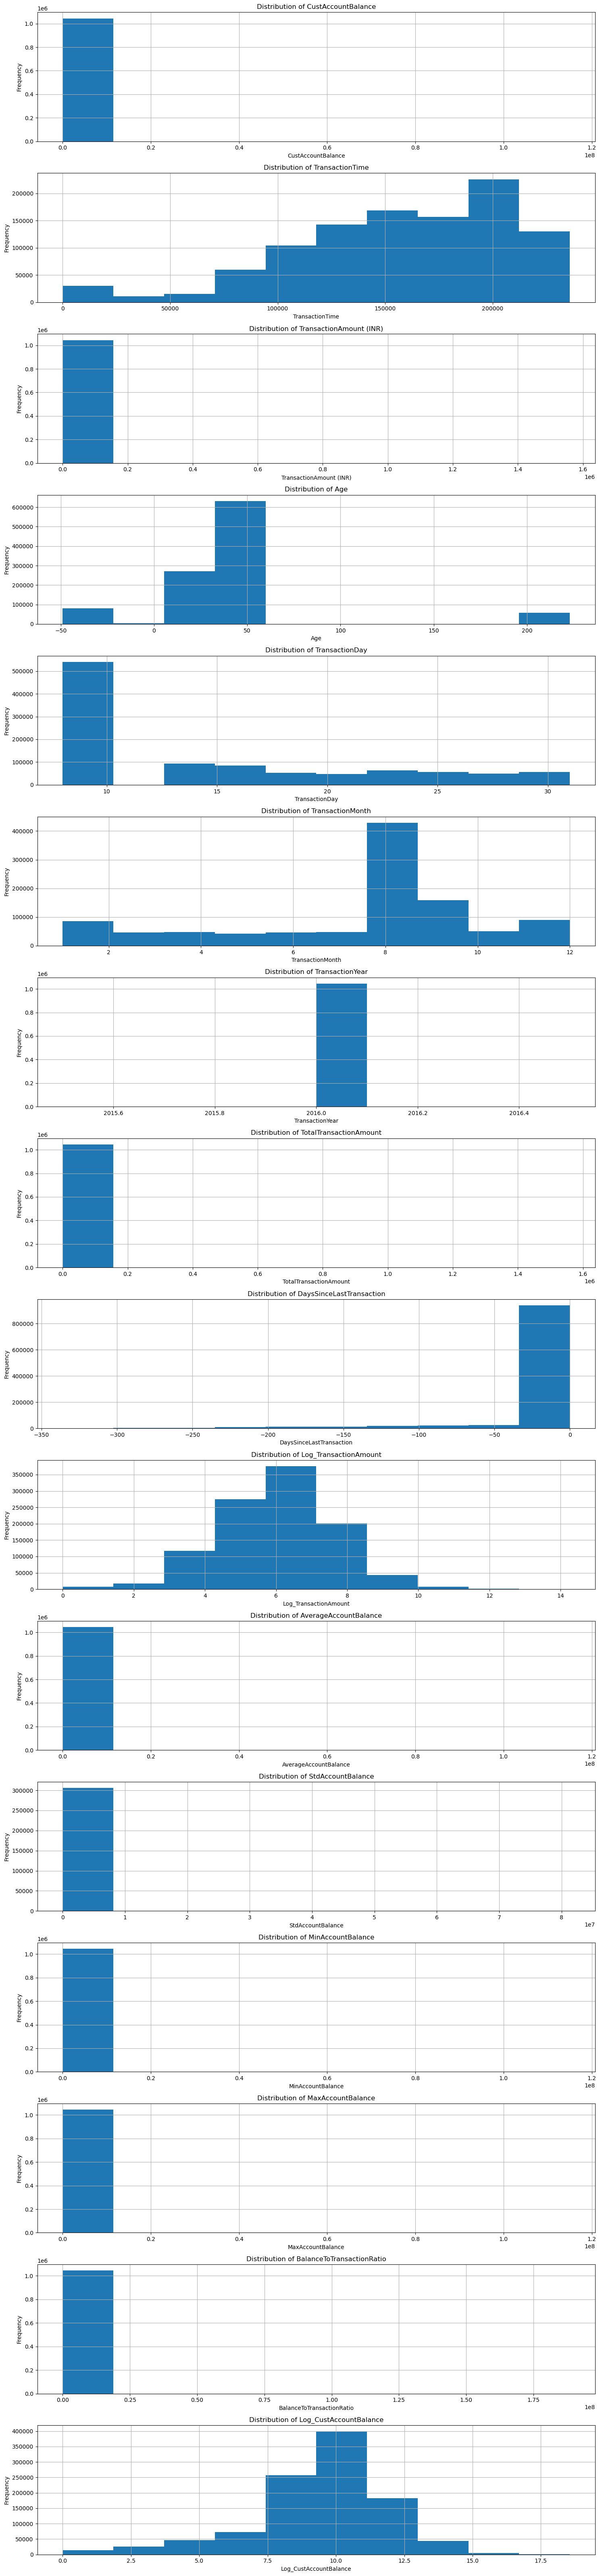

In [27]:
import matplotlib.pyplot as plt

# Filter out numerical columns
numerical_cols = bank_transactions_data.select_dtypes(include=['int64', 'float64']).columns

# Set the size of the plots
plt.figure(figsize=(15, len(numerical_cols) * 4))

# Plot a histogram for each numerical column
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)  # Creating subplots
    bank_transactions_data[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
# Selecting only categorical columns
categorical_cols = bank_transactions_data.select_dtypes(include=['object'])

# Counting the number of unique values in each categorical column
unique_values_count = categorical_cols.nunique()

# Printing the count of unique values for each column
print(unique_values_count)


TransactionID    1045170
CustomerID        881893
CustGender             3
CustLocation        9303
dtype: int64
